In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt

In [2]:
#pip install tpot

In [90]:
from tpot import TPOTClassifier

C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


### Import MNIST Dataset

In [4]:
df_train = pd.read_csv('C:/Users/M.S.Chandrashekar/Desktop/Python/Machine learning/MNIST/digittrain.csv')
df_train.head()
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
df_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [6]:
X = df_train.iloc[:, 1:]
y= df_train['label']
#print(X.head(),y.head())
X.set_index(X.index,inplace=True)
X.index

RangeIndex(start=0, stop=42000, step=1)

### Visualising digit data 

In [7]:
df_train_in = df_train.drop('label',axis=1)
dftr_r4 = np.array(df_train_in.iloc[[3]])
dftr_r4
dftr_r4 = dftr_r4.reshape(28,28)

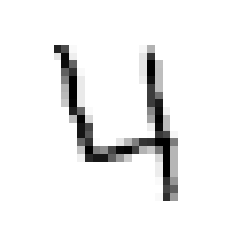

In [8]:
plt.imshow(dftr_r4,cmap = 'binary')
plt.axis('off')
plt.show()

In [3]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [8]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,25200.0,25200.0,25200.0,25200.0,25200.0,25200.0,25200.0,25200.0,25200.0,25200.0,...,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.0,25200.0,25200.0,25200.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.162698,0.075992,0.050079,0.019921,0.026746,0.004762,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.417045,3.604277,3.112446,1.543193,2.425394,0.534809,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,177.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


### Random Forest Classification and prediction
#### GridSearch CV for RF best parameters

In [49]:
paramsRF = {'n_estimators':[100],'criterion':['gini', 'entropy']}

RandomFrCl = RandomForestClassifier()

RandomFrCl_CV = GridSearchCV(RandomFrCl, paramsRF, cv=5)

RandomFrCl_CV.fit(X_train, y_train)

RandomFrCl_CV.best_params_

{'criterion': 'gini', 'n_estimators': 100}

#### Random Forest model Fit, prediction and score

In [50]:
RandomFCL = RandomForestClassifier(n_estimators = 100, criterion = 'gini')

In [51]:
RandomFCL.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
y_pred_pr = RandomFCL.predict_proba(X_test)
y_pred = RandomFCL.predict(X_test)

In [53]:
roc_auc_sc = roc_auc_score(y_test, y_pred_pr, multi_class = 'ovr')

roc_auc_sc

0.9984763613035955

In [54]:
rf_acc_score = accuracy_score(y_test, y_pred)
rf_acc_score

0.9607142857142857

In [55]:
labels = [0,1,2,3,4,5,6,7,8,9]

In [92]:
cfm = confusion_matrix(y_test, y_pred)

#### Mean True positive rate (recall) for RF model

In [57]:
RF_FP = cfm.sum(axis=0) - np.diag(cfm)
RF_FN = cfm.sum(axis=1) - np.diag(cfm)
RF_TP = np.diag(cfm)
RF_TPR = (RF_TP/(RF_TP + RF_FN))
RF_TPR.mean()

0.9606515144128155

#### Visualising confusion matrix in Heatmap - Random Forest Classifier

In [17]:
import seaborn as sns

Text(114.0, 0.5, 'Actual')

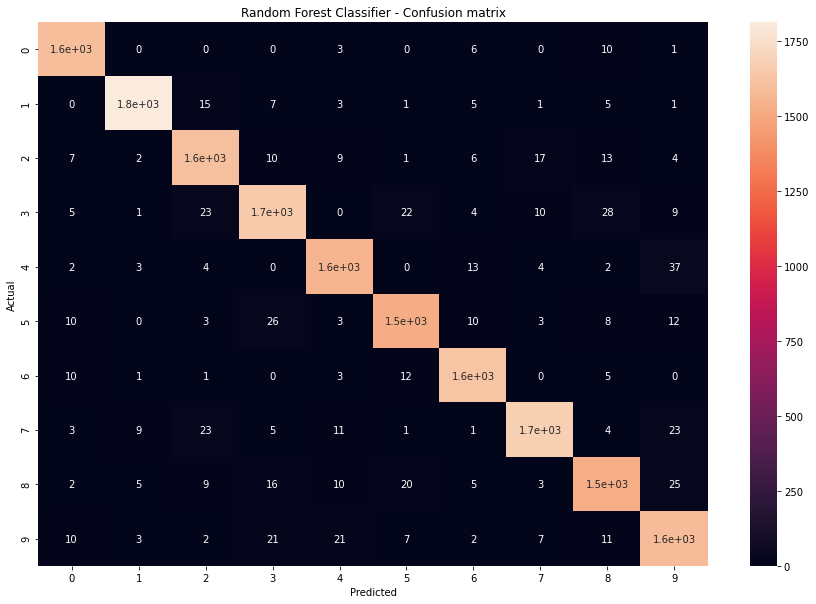

In [58]:
plt.figure(figsize = (15,10))
sns.heatmap(cfm, annot = True)
plt.title("Random Forest Classifier - Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

We can infer below points from the multi-class confusion matrix:
1. Highest False positive count with digits 4 & 9 - where digit actual is 4 and predicted as 9 for 37 counts
2. More than 20 False positives predicted as 2,3,4,8,9 for actual digits (7,3),(5,9),(9),(3) & (4,7,8) respectively.


### SVM Classifier

In [24]:
svc_model = SVC(class_weight='balanced')

In [25]:
svc_model.fit(X_train, y_train)

SVC(class_weight='balanced')

In [26]:
y_pred_svc = svc_model.predict(X_test)

In [29]:
cfm_SVC = confusion_matrix(y_test, y_pred_svc, labels=labels)
svc_acc_score = accuracy_score(y_test, y_pred_svc)
svc_acc_score

0.9719047619047619

#### Visualising confusion matrix in Heatmap - SVM Classifier

Text(0.5, 1.0, 'SVM Classifier - Confusion matrix')

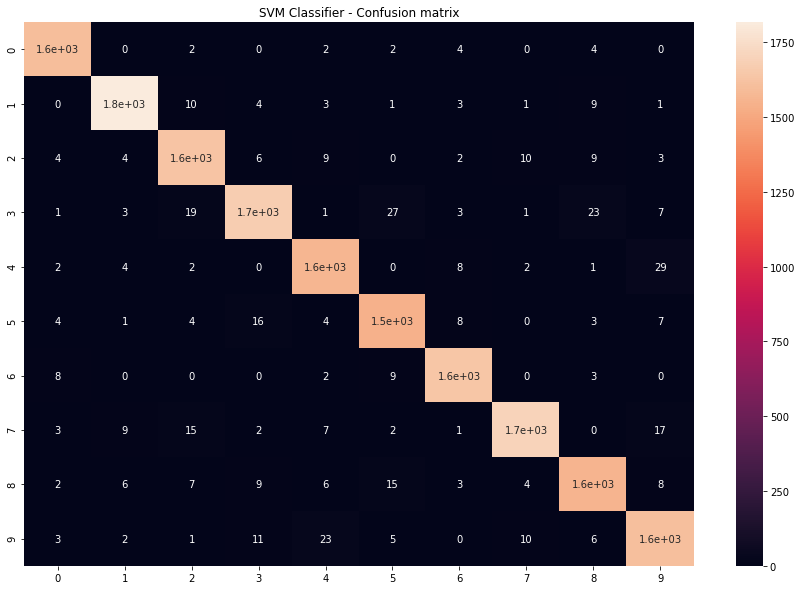

In [30]:
plt.figure(figsize = (15,10))
sns.heatmap(cfm_SVC, annot = True)
plt.title("SVM Classifier - Confusion matrix")

#### Mean True positive rate (recall) for RF model

In [45]:
svc_FP = cfm_SVC.sum(axis=0) - np.diag(cfm_SVC)
svc_FN = cfm_SVC.sum(axis=1) - np.diag(cfm_SVC)
svc_TP = np.diag(cfm_SVC)
svc_TPR = (svc_TP/(svc_TP + svc_FN))
svc_TPR.mean()

0.9719502693214714

#### Prediction vs Test value actual - with digit image data - SVM classifier

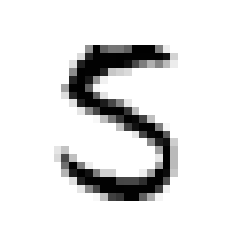

In [29]:
x_test_img = np.array(X_test.iloc[[0]])
x_test_img
x_test_img = x_test_img.reshape(28,28)

plt.imshow(x_test_img,cmap = 'binary')
plt.axis('off')
plt.show()

In [31]:
y_test_rind = pd.DataFrame(y_test, index=y_test.index)
y_test_rind.head()
print(type(y_test_rind))

<class 'pandas.core.frame.DataFrame'>


In [32]:
y_test_rind.reset_index(inplace=True)
y_test_rind.head()

,index,label
0,7288,5
1,6403,8
2,41788,9
3,15243,7
4,27507,4


### SGD Classifier Model and prediction

In [60]:
sgd_model = SGDClassifier(loss='log')

sgd_model.fit(X_train, y_train)

SGDClassifier(loss='log')

In [61]:
y_pred_sgd = sgd_model.predict(X_test)

#y_pred_sgd_pr = sgd_model.predict_proba(X_test)

In [62]:
sgd_acc_score = accuracy_score(y_test, y_pred_sgd)
sgd_acc_score

0.86125

Text(0.5, 1.0, 'SGD Classifier - confusion Matrix')

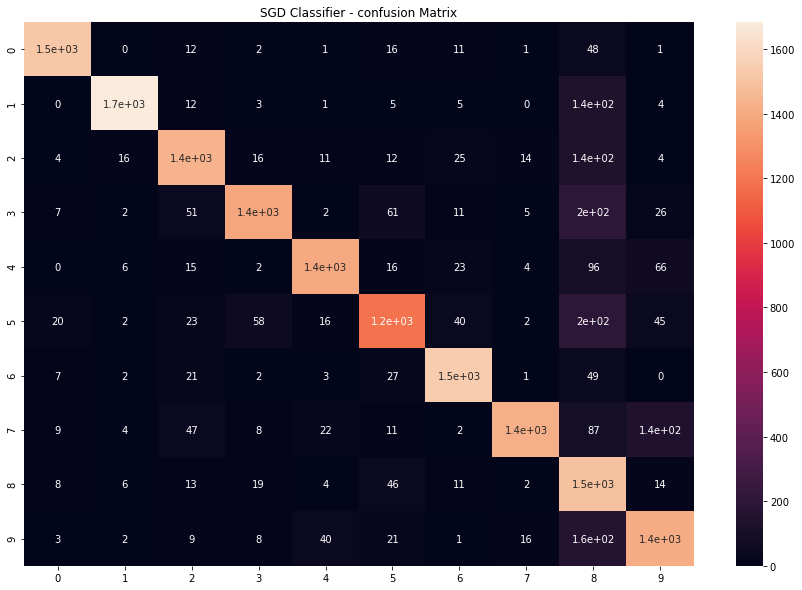

In [63]:
cfm_sgd = confusion_matrix(y_test, y_pred_sgd)
plt.figure(figsize = (15,10))
sns.heatmap(cfm_sgd, annot = True)
plt.title("SGD Classifier - confusion Matrix")

#### Mean True positive rate (recall) for SGD model

In [64]:
sgd_FP = cfm_sgd.sum(axis=0) - np.diag(cfm_sgd)
sgd_FN = cfm_sgd.sum(axis=1) - np.diag(cfm_sgd)
sgd_TP = np.diag(cfm_sgd)
sgd_TPR = (sgd_TP/(sgd_TP + sgd_FN))
sgd_TPR.mean()

0.8613305579665553

### TPOT Classifier

In [39]:
tpot = TPOTClassifier(generations=2, population_size=3, verbosity=2, offspring_size=3, scoring='accuracy', cv=5)

In [40]:
tpot.fit(X_train, y_train)


Generation 1 - Current best internal CV score: 0.908452380952381

Generation 2 - Current best internal CV score: 0.908452380952381

Best pipeline: LogisticRegression(ZeroCount(input_matrix), C=0.001, dual=False, penalty=l2)


TPOTClassifier(generations=2, offspring_size=3, population_size=3,
               scoring='accuracy', verbosity=2)

### Logistic Reg based on TPOT recommendation for 2 Gens

In [66]:
Logreg = LogisticRegression(C=0.001, dual=False, penalty='l2')

Logreg.fit(X_train, y_train)

C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.001)

In [67]:
y_pred = Logreg.predict(X_test)
y_pred_pr = Logreg.predict_proba(X_test)

lg_acc_score = accuracy_score(y_test, y_pred)

lg_reg_roc_score = roc_auc_score(y_test, y_pred_pr,multi_class = 'ovr')

print(lg_acc_score, lg_reg_roc_score)

0.90875 0.9914560849404698


### Visualise confusion matrix for Log Reg model

In [68]:
cfm_reg = confusion_matrix(y_test, y_pred)

Text(0.5, 1.0, 'Log Reg classifier - confusion Matrix')

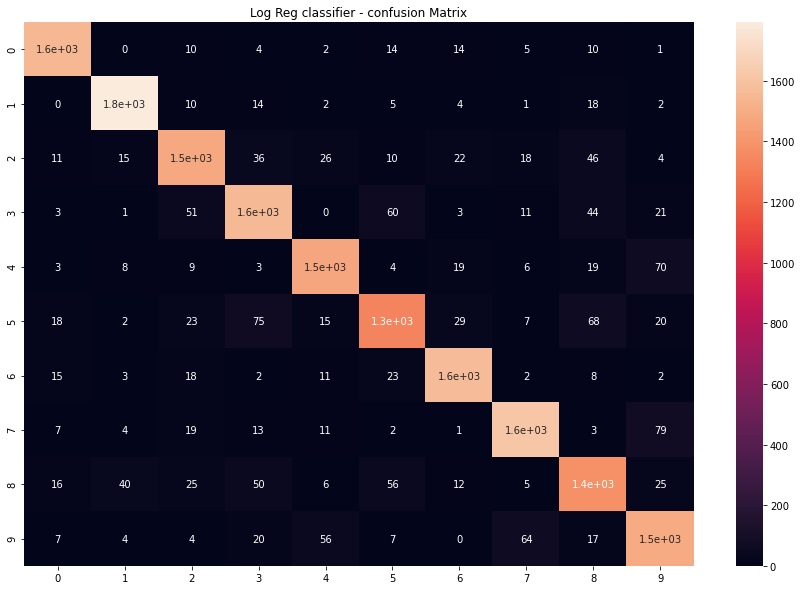

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(cfm_reg, annot = True)
plt.title("Log Reg classifier - confusion Matrix")

#### Mean True positive rate (recall) for Log Reg model

In [71]:
lg_FP = cfm_reg.sum(axis=0) - np.diag(cfm_reg)
lg_FN = cfm_reg.sum(axis=1) - np.diag(cfm_reg)
lg_TP = np.diag(cfm_reg)
lg_TPR = (lg_TP/(lg_TP + lg_FN))
lg_TPR.mean()

0.9078871803891986

### TPOT Classifier - iteration 2

In [51]:
tpot = TPOTClassifier(generations=2, population_size=3, verbosity=2, offspring_size=3, scoring='accuracy', cv=5, n_jobs=-1)

tpot.fit(X_train, y_train)


Generation 1 - Current best internal CV score: 0.9459523809523809

Generation 2 - Current best internal CV score: 0.9471825396825396

Best pipeline: ExtraTreesClassifier(Normalizer(input_matrix, norm=l2), bootstrap=True, criterion=entropy, max_features=0.3, min_samples_leaf=7, min_samples_split=11, n_estimators=100)


TPOTClassifier(generations=2, n_jobs=-1, offspring_size=3, population_size=3,
               scoring='accuracy', verbosity=2)

### Extra Trees Classifier as per TPOT Classifier - iter 2

In [72]:
from sklearn.ensemble import ExtraTreesClassifier

In [73]:
ETCl_model = ExtraTreesClassifier(bootstrap=True, criterion='entropy', max_features=0.3, min_samples_leaf=7, min_samples_split=11, n_estimators=100)

ETCl_model.fit(X_train, y_train)


ExtraTreesClassifier(bootstrap=True, criterion='entropy', max_features=0.3,
                     min_samples_leaf=7, min_samples_split=11)

In [74]:
y_pred_ETC = ETCl_model.predict(X_test)
y_pred_pr_ETC = ETCl_model.predict_proba(X_test)

#### Visualising confusion matrix for Extra Trees Model

In [75]:
cfm_ETC = confusion_matrix(y_test, y_pred_ETC)

Text(0.5, 1.0, 'Extra Tree Classifier - confusion matrix')

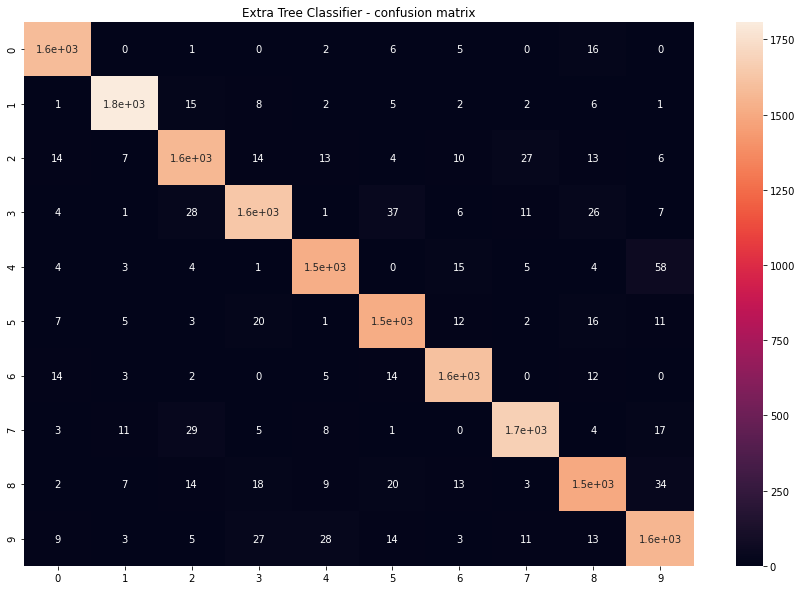

In [76]:
plt.figure(figsize=(15,10))
sns.heatmap(cfm_ETC, annot = True)
plt.title("Extra Tree Classifier - confusion matrix")

In [77]:
ETCl_acc_score = accuracy_score(y_test, y_pred_ETC)
ETCl_roc_auc_score = roc_auc_score(y_test, y_pred_pr_ETC, multi_class='ovr')

print(ETCl_acc_score, ETCl_roc_auc_score)

0.9504166666666667 0.9977028581185954


#### Mean True positive rate (recall) for ExtraTrees model

In [78]:
et_FP = cfm_ETC.sum(axis=0) - np.diag(cfm_ETC)
et_FN = cfm_ETC.sum(axis=1) - np.diag(cfm_ETC)
et_TP = np.diag(cfm_ETC)
et_TPR = (et_TP/(et_TP + et_FN))
et_TPR.mean()

0.950229771221097

### Accuracy Score for each model

In [89]:
score_list_ac = [rf_acc_score, svc_acc_score, sgd_acc_score, lg_acc_score, ETCl_acc_score]
score_list_names = ["RandomForest Cl", "Support Vector CL", "Stoch Grad CL", "Log Reg CL", "ExtraTrees CL"]

score_dict = dict(zip(score_list_ac, score_list_names))

score_list_ac

[0.9607142857142857, 0.9719047619047619, 0.86125, 0.90875, 0.9504166666666667]

Text(0.5, 1.0, 'Accuracy score')

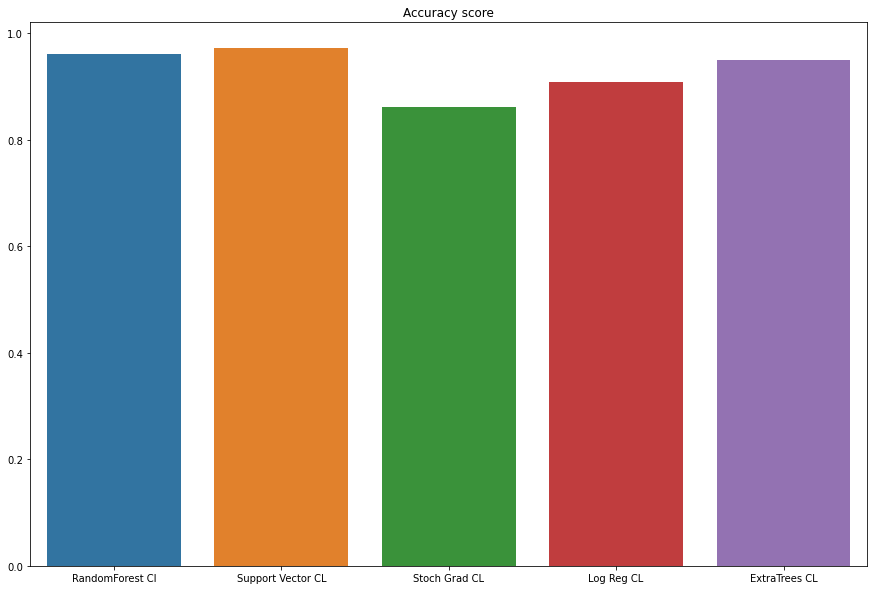

In [83]:
plt.figure(figsize=(15,10))
sns.barplot(x=score_list_names, y = score_list_ac)
plt.title("Accuracy score")

Highest accuracy score - Support Vector CL with 97.2%

### Mean TPR plot for each model

In [85]:
score_list_TPR = [RF_TPR.mean(), svc_TPR.mean(), sgd_TPR.mean(), lg_TPR.mean(), et_TPR.mean()]
score_list_names = ["RandomForest Cl", "Support Vector CL", "Stoch Grad CL", "Log Reg CL", "ExtraTrees CL"]
score_list_TPR

[0.9606515144128155,
 0.9719502693214714,
 0.8613305579665553,
 0.9078871803891986,
 0.950229771221097]

Text(0.5, 1.0, 'TPR (Recall)')

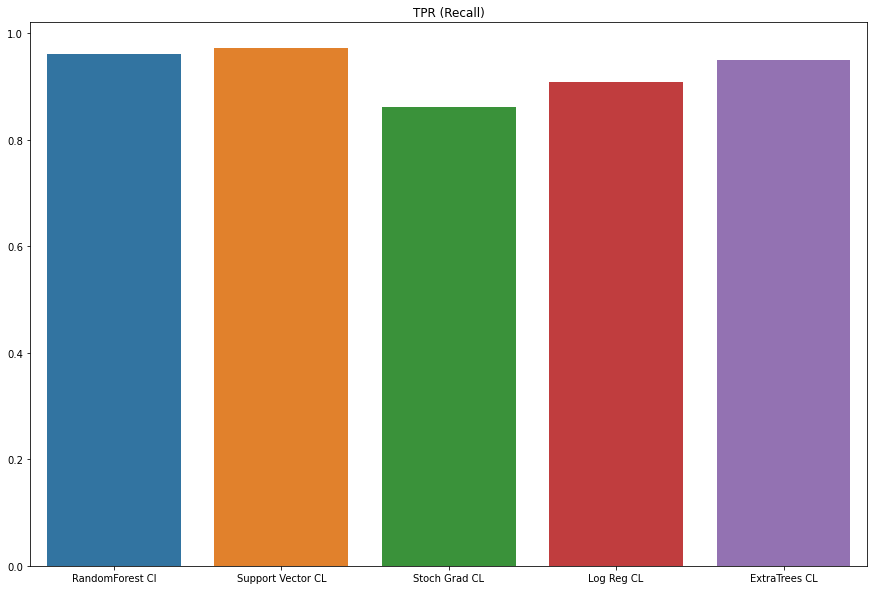

In [87]:
plt.figure(figsize=(15,10))
sns.barplot(x=score_list_names, y = score_list_TPR)
plt.title("TPR (Recall)")

Highest mean TPR (Recall value) - Support Vector CL with 97.2%

### import actual test data set

In [14]:
df_test1 = pd.read_csv('C:/Users/M.S.Chandrashekar/Desktop/Python/Machine learning/MNIST/digittest.csv')

In [15]:
df_test1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


### Predictions with actual test data - SVM Model with best acuracy and TPR value

In [79]:
y_prediction_actual = svc_model.predict(df_test1)

print(y_prediction_actual.shape)

(28000,)
